# Adversary útoky  
Neuronové sítě dnes dokáží snadno poznat, co se nachází na obrázku, který jim byl předložen. Také dokážou zjistit, kdo mluví na záznamu telefoního hovoru a co vlastně říká. Pravda, ne vždy se trefí. Nicméně sítě poskytují i informaci o tom, jak moc si jsou jisté svým odhadem, a u špatných tipů bývá toto číslo dosti nízké. To vše ale platí jen pro normální, přirozené vstupy - nezmanipulované obrázky, nemodifikované záznamy hovorů. Existují postupy, jak vstupní záznam poupravit, aby pak síť s velkou jistotou tvrdila, že na obrázku s ledním medvědem je pštros, aby si myslela, že namísto člověka X mluví člověk Y či aby při ovládání samořiditelného auta viděla místo značky STOP značku týkající se maximální povolené rychlosti. Takovéto změny označujeme jako adversary útoky.  
Ukázku typického adversary útoku vidíme na obr. 1. V levém sloupci můžeme pozorovat původní obrázky, které neuronová síť klasifikuje správně. V pravém sloupci jsou obrázky upravené. Z pohledu člověka vypadají úplně stejně jako ty původní. Síť se ale domnívá, že se na všech nachází pštros. Desetinásobně zesílení rozdílu původního a upraveného obrázku se nalézá v prostředním sloupci. Změna je tedy vskutku marginální. Jak ale bylo možné neuronovou síť zmást?
![szegedy](adversary_figures/szegedy.png)  
*Obrázek 1: Ukázka adversary útoku. Levý sloupec - původní obrázky, pravý sloupec - upravené obrázky neuronovou sítí interpretované jako pštros, prostřední sloupec - desetinásobek rozdílu upravených a neupravených obrázků. Zdroj - [Szegedy et al., 2014](https://arxiv.org/abs/1312.6199).*  
  
Předpokládejme, že bychom měli množinu obrázků o rozměru 1000x1000 pixelů. S jistou mírou nepřesnosti lze tvrdit, že všechny tyto obrázky lze namapovat na nějaký prostor, který si síť vytvoří při svém učení - viz obrázek 2. Když je pak síti předhozen neznámý obrázek k oklasifikování, promítne si ho síť do tohoto prostoru a když dejme tomu po této operaci obrázek skončí v zelené oblasti, prohlásí se, že je na něm tučnák císařský.  
![prostor](adversary_figures/space.png)  
*Obrázek 2: Ilustrace prostoru obrázků. Fotky [pocházejí](https://en.wikipedia.org/wiki/Emperor_penguin) [z](https://en.wikipedia.org/wiki/King_penguin) [wikipedie](https://cs.wikipedia.org/wiki/S%C3%BDkorovit%C3%AD).*  
  
Situace je pravda poněkud komplikovanější. Například výše zmíněný prostor není placka o dvou osách. Fakticky co pixel, to osa o možných hodnotách 0 až 255. No a pixelů máme v našem připadě 1000x1000x3 (trojka je za tři barevné kanály). To fakticky znamená, že v tomto prostoru může existovat 256^3000000 unikátních obrázků, z nichž byla při učení modelu použita jen drobounká část. Díky tomu je možné změnit v obrázku tučnáka trochu hodnoty pár pixelů (anebo minimálně změnit hodnoty mnoha pixelů), a síť už tučńáka nevidí. Dokonce je možné změnit pixely tak, že i když člověk pořád vidí obyvatele Antarktidy, síť si myslí, že vidí sýkorku.  
Samozřejmě náhodná změna pár pixelů by s největší pravděpodobností žádno změnu v klasifikaci nevyvolala. Aplikace hrubé síly - procházení všech kombinací pixelů a jejich hodnot - by byla výpočetně neutáhnutelná. Nicméně existují postupy, které výpočetně náročné nejsou a přesto (obvykle) vedou k vytyčenému cíly - například se v prostoru obrázků vytipuje pár směrů a jde se tím, ve kterém dochází k nejprudší změně pravděpodobnosti klasifikace té které třídy.  
Úloha může být postavena i naopak - namísto toho, aby byl vytvořen obrázek, na kterém člověk vidí tučňáka a síť nějaký nesmysl, lze vytvořit obrázek, na kterém člověk vidí nesmysl a síť vidí tučnáka - viz obrázek 3. Princip je asi takový, že síť, která fake obrázky vytváří, se snaží akcentovat věci unikátní pro tu kterou třídu a nezajímají ji prvky, které se nalézají u hromady dalších tříd. To je asi nejlépe vidět na fake obrázcích, které ještě částečně svůj předobraz připomínají - viz obrázek 4.
![divne_tvary](adversary_figures/nguyen1.png)
*Obrázek 3: Abstraktní tvary, které ale neuronová síť s velkou pravděpodobností připisuje reálným objektům. Zdroj - [Nguyen et al., 2015.](https://arxiv.org/abs/1412.1897)*  
  
![lehce_divne_tvary](adversary_figures/nguyen2.png)  
*Obrázek 4: Falešné obrázky, ze kterých je patrný jejich předobraz. Zdroj - [Nguyen et al., 2015.](https://arxiv.org/abs/1412.1897)*  
  
Doposud jsme mluvili o úpravách obrázků v digitální formě. Adversary útoky lze ale aplikovat i ve fyzickém světě. Například si lze na obručky brýlí dát papírovou obálku (viz obrázek 5), díky které systémy na rozpoznání obličeje člověka nerozpoznají, případně ho dokonce rozpoznají jako jinou, při výrobě "potisku" předem stanovenou osobu. Dále bylo ukázáno, že po nalepení pár neškodně vypadajících nálepek na dopravní značku (obrázek 6) by mohly systémy v samořídících autech onu značku interpretovat úplně jinak než člověk.

![bryle](adversary_figures/sharif.png) 
*Obrázek 5: Brýle, přes které je přeložený papírový potisk, díky němuž selžou systémy na rozpoznání obličeje. Zdroj - [Sharif et al., 2016.](https://dl.acm.org/doi/10.1145/2976749.2978392)*  
  
![znacka](adversary_figures/eykholt.png)
*Obrázek 6: Vlevo je normální zvandalizovaná značka, vpravo je značka, kterou díky rozmístěným nevinně vypadajícím nálepkám vyhodnotí neuronová síť jako "Speed limit 45". Zdroj - [Eykholt et al., 2018](https://arxiv.org/abs/1707.08945).*

Aby nedošlo k nedorozumění - i když se těch pár příkladů výše týkalo obrázků (a tedy konvolučních sítí), lze takto zfalšovat i zvukové nahrávky (a tak provést adversary útok třeba na LSTM síť).  
Jak se adversary útokům bránit? No... ne moc snadno. Sice je možné dát nějaké fake obrázky do trénovacích dat, ale množství potenciálně vyrobitelných falešných obrázků je zkrátka příliš velké a fake obrázky se navzájem od sebe zkrátka odlišují příliš moc na to, aby takovýto postup mohl nést ovoce. Jednou možná překvapivou možností je mít méně kvalitní kamery (či obecně senzory). Adversary útoky stojí a padají na poměrně malých změnách na pár pixelech, neboť jinak by mohly zaačít být lidem podezřelé. No a když kamera tyto změny kvůli malému rozlišení nedokáže zaznamenat, nemůže se adversary útok ani dostat dál do systému.

# Praktická ukázka

Teorie je sice pěkná, ale přeci jen by bylo žádoucí vyzkoušet si vytvoření fake obrázku na vlastním železe. Výhodou postupu, který si teď ukážeme, je skutečnost, že i při absenci grafické karty bude trvat běh na výpočty nejnáročnější buňky jen pár (desítek) sekund.   
Nejprve si naimportujeme knihovny. Zde by bylo asi vhodné poznamenat, že na adversary útok se použil balíček foolbox, konkrétně jeho verze 3.1.1, a že tensorflow byl dvojkový (2.4.0).

In [1]:
import foolbox
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import decode_predictions

## Příklady z foolboxu

Asi bych měl předeslat, že dokumentace k trojkovému foolboxu je taková... no, podívejte se [sami](https://foolbox.readthedocs.io/en/stable/modules/models.html#foolbox.models.TensorFlowModel). Tudíž občas u některých parametrů váhám, co tam vlastně patří a může se stát, že tu budu psát zavádějící věci. Laskavý čtenář mi to snad promine.  
Nejprve si načteme předtrénovaný model na klasifikaci obrázků.

In [2]:
model = tf.keras.applications.ResNet50V2(weights="imagenet")

Následně si ho převeďmě na foolbox model. Mimo jiné zde musíme uvést informaci o tom, s jakými možnými hodnotami pixelů model počítá.

In [3]:
preprocessing = dict()
bounds = (0, 1)
fmodel = foolbox.TensorFlowModel(model, bounds=bounds, preprocessing=preprocessing)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Vezměme si pár testovacích obrázků z balíčku foolbox.

In [4]:
images, labels = foolbox.utils.samples(fmodel, dataset='imagenet', batchsize=16)

Nechejme si vypsat průměrnou přenost původního modelu. Ne že by nás tady tolik zajímala, avšak funguje zde tak trochu jako kanárek v dole - pokud člověk při nastavování něco pokazil, uvidí nulu.

In [5]:
foolbox.utils.accuracy(fmodel, images, labels)

0.875

V balíčku foolbox je naimplementovaná celá řada adversary útoků (viz [zde](https://foolbox.readthedocs.io/en/stable/modules/attacks.html)). Zde konkrétně bude použit algoritmus DeepFool (něco o něm [tady](https://arxiv.org/pdf/1511.04599.pdf))

In [6]:
attack = foolbox.attacks.LinfDeepFoolAttack()

Do tohoto objektu nyní nasypeme zkonvertovaný model, obrázky, které čeká změna, jejich labely, a nakonec parametr epsilon. Co je výstupem? Podle https://foolbox.jonasrauber.de/guide/getting-started.html:
 - The raw adversarial examples. This depends on the attack and we cannot make an guarantees about this output.
 - The clipped adversarial examples. These are guaranteed to not be perturbed more than epsilon and thus are the actual adversarial examples you want to visualize. Note that some of them might not actually switch the class. To know which samples are actually adversarial, you should look at the third tensor.
 - The third tensor contains a boolean for each sample, indicating which samples are true adversarials that are both misclassified and within the epsilon balls around the clean samples.

In [7]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

Vidíme, že podle třetího parametru byly dva z šestnácti adversary útoků neúspěšné.

In [8]:
is_adv

<tf.Tensor: shape=(16,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True])>

Nejprve se zaměříme na úspěšný útok.  
Takto vypadá původní obrázek:

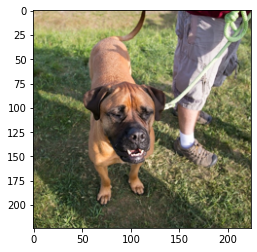

In [9]:
plt.imshow(images[0])

Podle původního modelu se jedná o bullmastifa.

In [10]:
prediction = model.predict(np.expand_dims(images[0], axis=0))
decode_predictions(prediction, top=10)[0]

[('n02108422', 'bull_mastiff', 0.9690304),
 ('n02108089', 'boxer', 0.030754017),
 ('n02093256', 'Staffordshire_bullterrier', 8.190256e-05),
 ('n02087394', 'Rhodesian_ridgeback', 6.854639e-05),
 ('n02093428', 'American_Staffordshire_terrier', 4.73089e-05),
 ('n02109047', 'Great_Dane', 9.978849e-06),
 ('n02088466', 'bloodhound', 2.3900616e-06),
 ('n02111129', 'Leonberg', 2.2951374e-06),
 ('n02093754', 'Border_terrier', 1.374699e-06),
 ('n02110958', 'pug', 7.213765e-07)]

Podívejme se nyní na upravený "clipped" obrázek. "Raw" obrázek ani pravděpodobnosti neukazuji, neboť se nijak významně v tomto případě od "clipped" verzí neliší.  
Obrázek vypadá (minimálně pro mne) úplně stejně. Nicméně podle původního modelu na upraveném obrázku už není bullmastif, nýbrž boxer. Popravdě když se koukám na [obrázky](https://en.wikipedia.org/wiki/Bullmastiff) na [wikině](https://en.wikipedia.org/wiki/Boxer_(dog)), tak mezi nimi nevidím moc rozdíl :D.

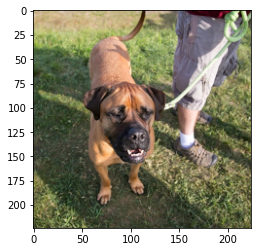

In [11]:
plt.imshow(clipped[0])

In [12]:
prediction = model.predict(np.expand_dims(clipped[0], axis=0))
decode_predictions(prediction, top=10)[0]

[('n02108089', 'boxer', 0.9990815),
 ('n02108422', 'bull_mastiff', 0.00091408344),
 ('n02112706', 'Brabancon_griffon', 1.9922195e-06),
 ('n02093256', 'Staffordshire_bullterrier', 1.3690247e-06),
 ('n02110958', 'pug', 2.8342038e-07),
 ('n02093428', 'American_Staffordshire_terrier', 2.5383045e-07),
 ('n02108915', 'French_bulldog', 2.473449e-07),
 ('n02087394', 'Rhodesian_ridgeback', 8.073514e-08),
 ('n02093754', 'Border_terrier', 7.989704e-08),
 ('n02109047', 'Great_Dane', 3.454091e-08)]

Mrkněme se nyní na obrázek, kde se adverary útok nezdařil. Síť si myslí, že se jedná o jurtu (v tom případě mne tedy zaráží zábradlí ve spodku obrázku...).

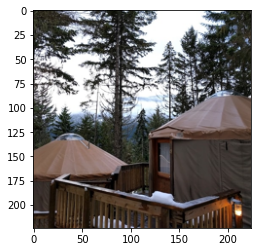

In [13]:
plt.imshow(images[8])

In [14]:
prediction = model.predict(np.expand_dims(images[8], axis=0))
decode_predictions(prediction, top=10)[0]

[('n04613696', 'yurt', 1.0),
 ('n01986214', 'hermit_crab', 1.0209927e-14),
 ('n03792972', 'mountain_tent', 3.1667494e-16),
 ('n07880968', 'burrito', 4.7569354e-17),
 ('n07875152', 'potpie', 3.818266e-18),
 ('n04380533', 'table_lamp', 2.0377607e-18),
 ('n02111129', 'Leonberg', 1.3405266e-18),
 ('n03131574', 'crib', 1.3305818e-18),
 ('n04258138', 'solar_dish', 1.2490698e-18),
 ('n01990800', 'isopod', 1.0273197e-18)]

Jurtu vidí model ale i na upraveném "clipped" obrázku...

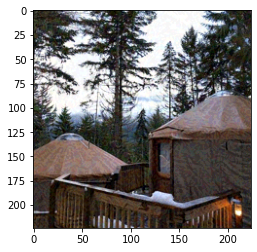

In [15]:
plt.imshow(clipped[8])

In [16]:
prediction = model.predict(np.expand_dims(clipped[8], axis=0))
decode_predictions(prediction, top=10)[0]

[('n04613696', 'yurt', 1.0),
 ('n01986214', 'hermit_crab', 3.894986e-18),
 ('n04417672', 'thatch', 1.7021963e-19),
 ('n02445715', 'skunk', 1.2856536e-21),
 ('n07880968', 'burrito', 6.0820393e-22),
 ('n03792972', 'mountain_tent', 1.269323e-22),
 ('n07875152', 'potpie', 4.9355395e-23),
 ('n04380533', 'table_lamp', 3.0737132e-23),
 ('n03868242', 'oxcart', 1.5807521e-23),
 ('n04258138', 'solar_dish', 1.1548761e-23)]

Na "raw" obrázku vidíme barevné cosi, co už pravda jako jurta klasifikováno není. Možná byl původní obrázek použit při trénování modelu, díky čemuž bylo i jeho epsilonové okolí "jurtovské" a až daleko za tou maximální povolenou vzdáleností se "jurtovskost" ztratila.

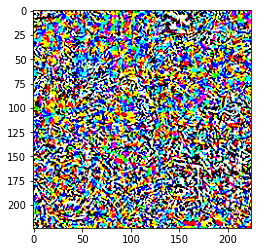

In [17]:
plt.imshow(raw[8])

In [18]:
prediction = model.predict(np.expand_dims(raw[8], axis=0))
decode_predictions(prediction, top=10)[0]

[('n03998194', 'prayer_rug', 0.42070293),
 ('n03980874', 'poncho', 0.29729807),
 ('n04599235', 'wool', 0.07389621),
 ('n03223299', 'doormat', 0.045483995),
 ('n03938244', 'pillow', 0.0342357),
 ('n04325704', 'stole', 0.018276079),
 ('n03207743', 'dishrag', 0.014422632),
 ('n04209239', 'shower_curtain', 0.010436282),
 ('n02840245', 'binder', 0.008252421),
 ('n04476259', 'tray', 0.007827588)]

## Foolbox na vlastním obrázku
Zkusme foolbox použít na nějaký obrázek, který nebyl přiložen k samotnému balíčku. Konkrétně ho aplikujeme na trojici tučňáků z [české wikipedie](https://cs.wikipedia.org/wiki/Tu%C4%8D%C5%88%C3%A1ci).  
Obrázek si nejprve v rámci načtení naškálujeme na rozměr 224x224 pixelů. Následně ho znormalizujeme - chceme totiž, aby pixely měly hodnoty z intervalu [0, 1] a ne z intervalu [0, 255]. Následně provedeme rozšíření pole o jednu dimenzi a pole převedeme na tenzor. Ten bude mít tvar (1, 224, 224, 3). Na prvním místě je de facto index obrázku - jelikož je v celém tenzoru jen jeden obrázek, je tu jen a pouze jednička. Na druhém a třetím místě jsou souřadnice pixelu - výška a šířka. Na posledním místě se nalézá index channelu, který má v tomto kontextu význam barvy.  

In [19]:
original_image = image.load_img("adversary_figures/tucnaci.jpg", target_size=(224, 224))
image_array = image.img_to_array(original_image)/255

image_batch = np.expand_dims(image_array, axis=0)
image_tensor = tf.convert_to_tensor(image_batch, dtype=tf.float32)

Podívejme se, jak tučňáci vlastně vypadají.

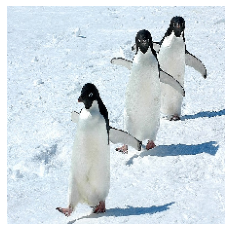

In [20]:
plt.imshow(image_tensor[0])
plt.axis("off");

Co ale vidí model? Tučňáka patagonského (anglicky king penguin).

In [21]:
prediction = model.predict(np.expand_dims(image_tensor[0], axis=0))
decode_predictions(prediction, top=10)[0]

[('n02056570', 'king_penguin', 0.9991959),
 ('n02090622', 'borzoi', 0.0001068172),
 ('n02091134', 'whippet', 7.3187475e-05),
 ('n10148035', 'groom', 3.0453268e-05),
 ('n01582220', 'magpie', 2.7495578e-05),
 ('n02089973', 'English_foxhound', 2.6304057e-05),
 ('n02441942', 'weasel', 2.3938379e-05),
 ('n02113799', 'standard_poodle', 2.3431441e-05),
 ('n02500267', 'indri', 2.1960137e-05),
 ('n02058221', 'albatross', 1.5729986e-05)]

Podle stejného postupu jako výše si vyrobíme fake obrázek. Tj. nejprve si převedeme Resnet na foolbox model.

In [23]:
preprocessing = dict()
bounds = (0, 1)
fmodel = foolbox.TensorFlowModel(model, bounds=bounds, preprocessing=preprocessing)

Provedeme sanity check. Zde je na třetím místě 1D tenzor, jehož elementem je index tučnáka patagonského (to číslo pochází z trénovacích dat Resnetu).

In [24]:
foolbox.utils.accuracy(fmodel, image_tensor, tf.constant([145]))

1.0

Opět proveďme útok. Co se vhodné volby epsilonu týče - to se musí vyzkoušet. Čím bude toto číslo větší, tím bude větší i pravděpodobnost, že útok proběhne úspěšně. Nicméně tím podezřeleji bude výsledný obrázek vypadat.

In [25]:
attack = foolbox.attacks.LinfDeepFoolAttack()
raw, clipped, is_adv = attack(fmodel, image_tensor, tf.constant([145]), epsilons=0.005)

Podle *is_adv* to vypadá, že útok proběhnul úspěšně.

In [26]:
is_adv

<tf.Tensor: shape=(1,), dtype=bool, numpy=array([ True])>

"Clipped" obrázek vypadá pro oko člověka stejně jako obrázek původní.

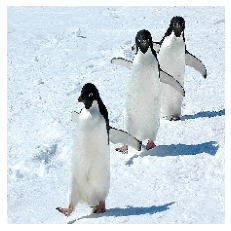

In [27]:
plt.imshow(clipped[0])
plt.axis("off");

O "raw" obrázku se to už pravda říci nedá.

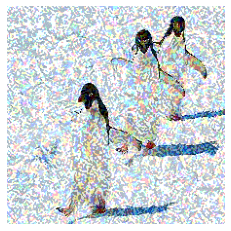

In [28]:
plt.imshow(raw[0])
plt.axis("off");

Co si ale myslí síť? "Clipped" obrázek ji přijde jako [barzoj](https://en.wikipedia.org/wiki/Borzoi), což je... hodně mimo :D. I dále v pořadí je to samý pes.

In [29]:
prediction = model.predict(np.expand_dims(clipped[0], axis=0))
decode_predictions(prediction, top=10)[0]

[('n02090622', 'borzoi', 0.9456272),
 ('n02102040', 'English_springer', 0.025779221),
 ('n02100735', 'English_setter', 0.007533577),
 ('n02091134', 'whippet', 0.0036153856),
 ('n02088094', 'Afghan_hound', 0.0031449546),
 ('n02086910', 'papillon', 0.0016510403),
 ('n02091831', 'Saluki', 0.0015597931),
 ('n03218198', 'dogsled', 0.0007957251),
 ('n02085782', 'Japanese_spaniel', 0.000780752),
 ('n02106030', 'collie', 0.00072354754)]

Jak velký je vasltně rozíl původního a "clipped" obrázku? Je takřka neznatelný.

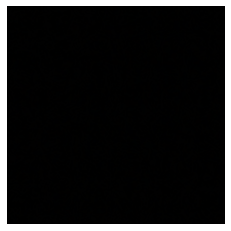

In [30]:
plt.imshow((image_tensor[0] - clipped[0]))
plt.axis("off");

Až když rozdíl zesílíme 100krát, tak je něco vidět.

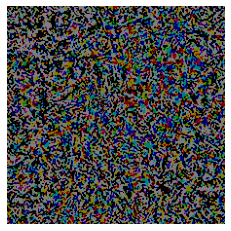

In [31]:
plt.imshow(100*(image_tensor[0] - clipped[0]))
plt.axis("off");